<a href="https://colab.research.google.com/github/valren-enforcer/ML-Internship/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TO DO**

https://www.reddit.com/r/computervision/comments/16k5001/extend_custom_trained_yolo_model_with_new_classes/

https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-epoch-in-machine-learning

https://stackoverflow.com/questions/31417487/sklearn-logisticregression-and-changing-the-default-threshold-for-classification

(article on epochs)

We need a threshold on the detections --> Around <25% do not detect?

We still need the audio/lights to tell the user about the detection --> Or can the just look at the bouding boxes and labels? Show Mr. Singh.

Hardware component --> We should start implementing that into our code.

What are the categories within the classes that the machine is trained on? --> Only gets compost, recyclables, and trash but does not get deeper than that (like plastic cups, etc).

# **CODE**

In [ ]:
!pip install ultralytics #Import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.6/799.6 kB 8.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO

In [ ]:
# Code for webcam pt. 1 # will we be using webcam or dataframe?

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


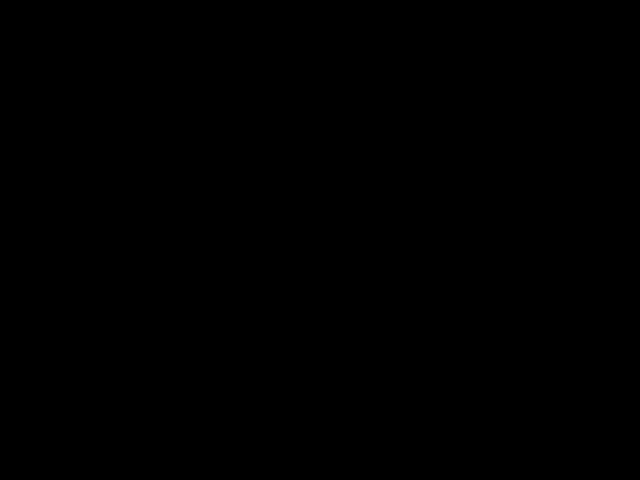

In [ ]:
# Code for webcame pt. 2

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

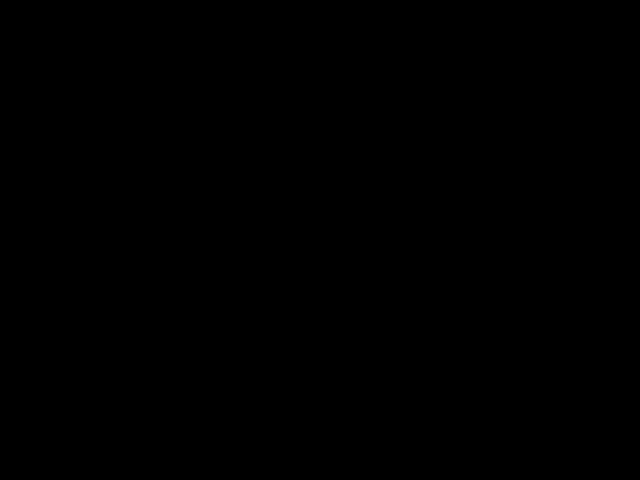

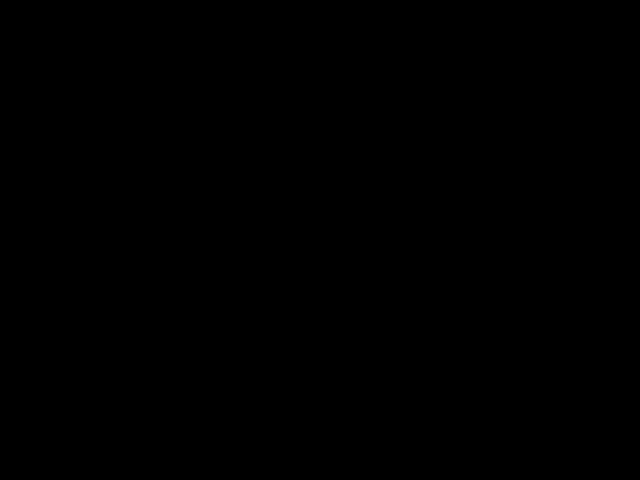

In [ ]:
# Normalize the image
import cv2
from google.colab.patches import cv2_imshow

# Read color image
image = cv2.imread("photo.jpg")

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Normalize grayscale image
normalized_gray_image = cv2.normalize(
    gray_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Convert normalized grayscale image back to color
normalized_color_image = cv2.cvtColor(normalized_gray_image, cv2.COLOR_GRAY2BGR)

# Display original and normalized images, if you need for error correction
cv2_imshow(image)
cv2_imshow(normalized_color_image)

In [ ]:
model = YOLO("yolov5n.pt") # smallest, fastest yolov5 model (may change later to accomodate for whatever)

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model = YOLO("/content/drive/MyDrive/runs/detect/train/weights/best.pt")

In [ ]:
#we need to copy dataset_10 and import it into our own drives (it's originally in "shared with me" location, so requires alter to go with code)
#model.train(data = "/content/drive/MyDrive/dataset_v3/data.yaml", epochs = 50, model="yolov5n.pt") # still need a dataset to train the model and then incorporate into Koleman's model to ensure recyclables, trash, and compost can be identified.

In [ ]:
result = model.predict("bag.webp") # why are there no detections? maybe we need more epochs to train the dataset # format of files matters in YOLOv5


image 1/1 /content/bag.webp: 384x640 5 trashs, 12.9ms
Speed: 3.1ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
result = result[0]
len(result.boxes)

5

In [ ]:
print(result.names)

{0: 'compost', 1: 'recyclable', 2: 'trash'}


In [ ]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  if class_id in ["compost"]:
    print("This goes in the compost bin!")
    label = box.cls[0].item()
    cords = [round(x) for x in box.xyxy[0].tolist()]
    prob = box.conf[0].item()
    print("Object type: " , label)
    print("Coordinates: ", cords)
    print("Probability: ", prob)
    print("---")

  elif class_id in ["recyclable"]:
    print("This goes in the recycle bin!")
    label = box.cls[0].item()
    cords = [round(x) for x in box.xyxy[0].tolist()]
    prob = box.conf[0].item()
    print("Object type: " , label)
    print("Coordinates: ", cords)
    print("Probability: ", prob)
    print("---")

  else:
    print("This goes in the trash bin!")
    label = box.cls[0].item()
    cords = [round(x) for x in box.xyxy[0].tolist()]
    prob = box.conf[0].item()
    print("Object type: " , label)
    print("Coordinates: ", cords)
    print("Probability: ", prob)
    print("---")

This goes in the trash bin!
Object type:  2.0
Coordinates:  [8, 61, 668, 1261]
Probability:  0.8157903552055359
---
This goes in the trash bin!
Object type:  2.0
Coordinates:  [1480, 101, 2526, 1408]
Probability:  0.7136707901954651
---
This goes in the trash bin!
Object type:  2.0
Coordinates:  [629, 38, 1507, 1363]
Probability:  0.693279504776001
---
This goes in the trash bin!
Object type:  2.0
Coordinates:  [639, 388, 1478, 1382]
Probability:  0.4815139174461365
---
This goes in the trash bin!
Object type:  2.0
Coordinates:  [1009, 25, 1515, 1336]
Probability:  0.36634594202041626
---


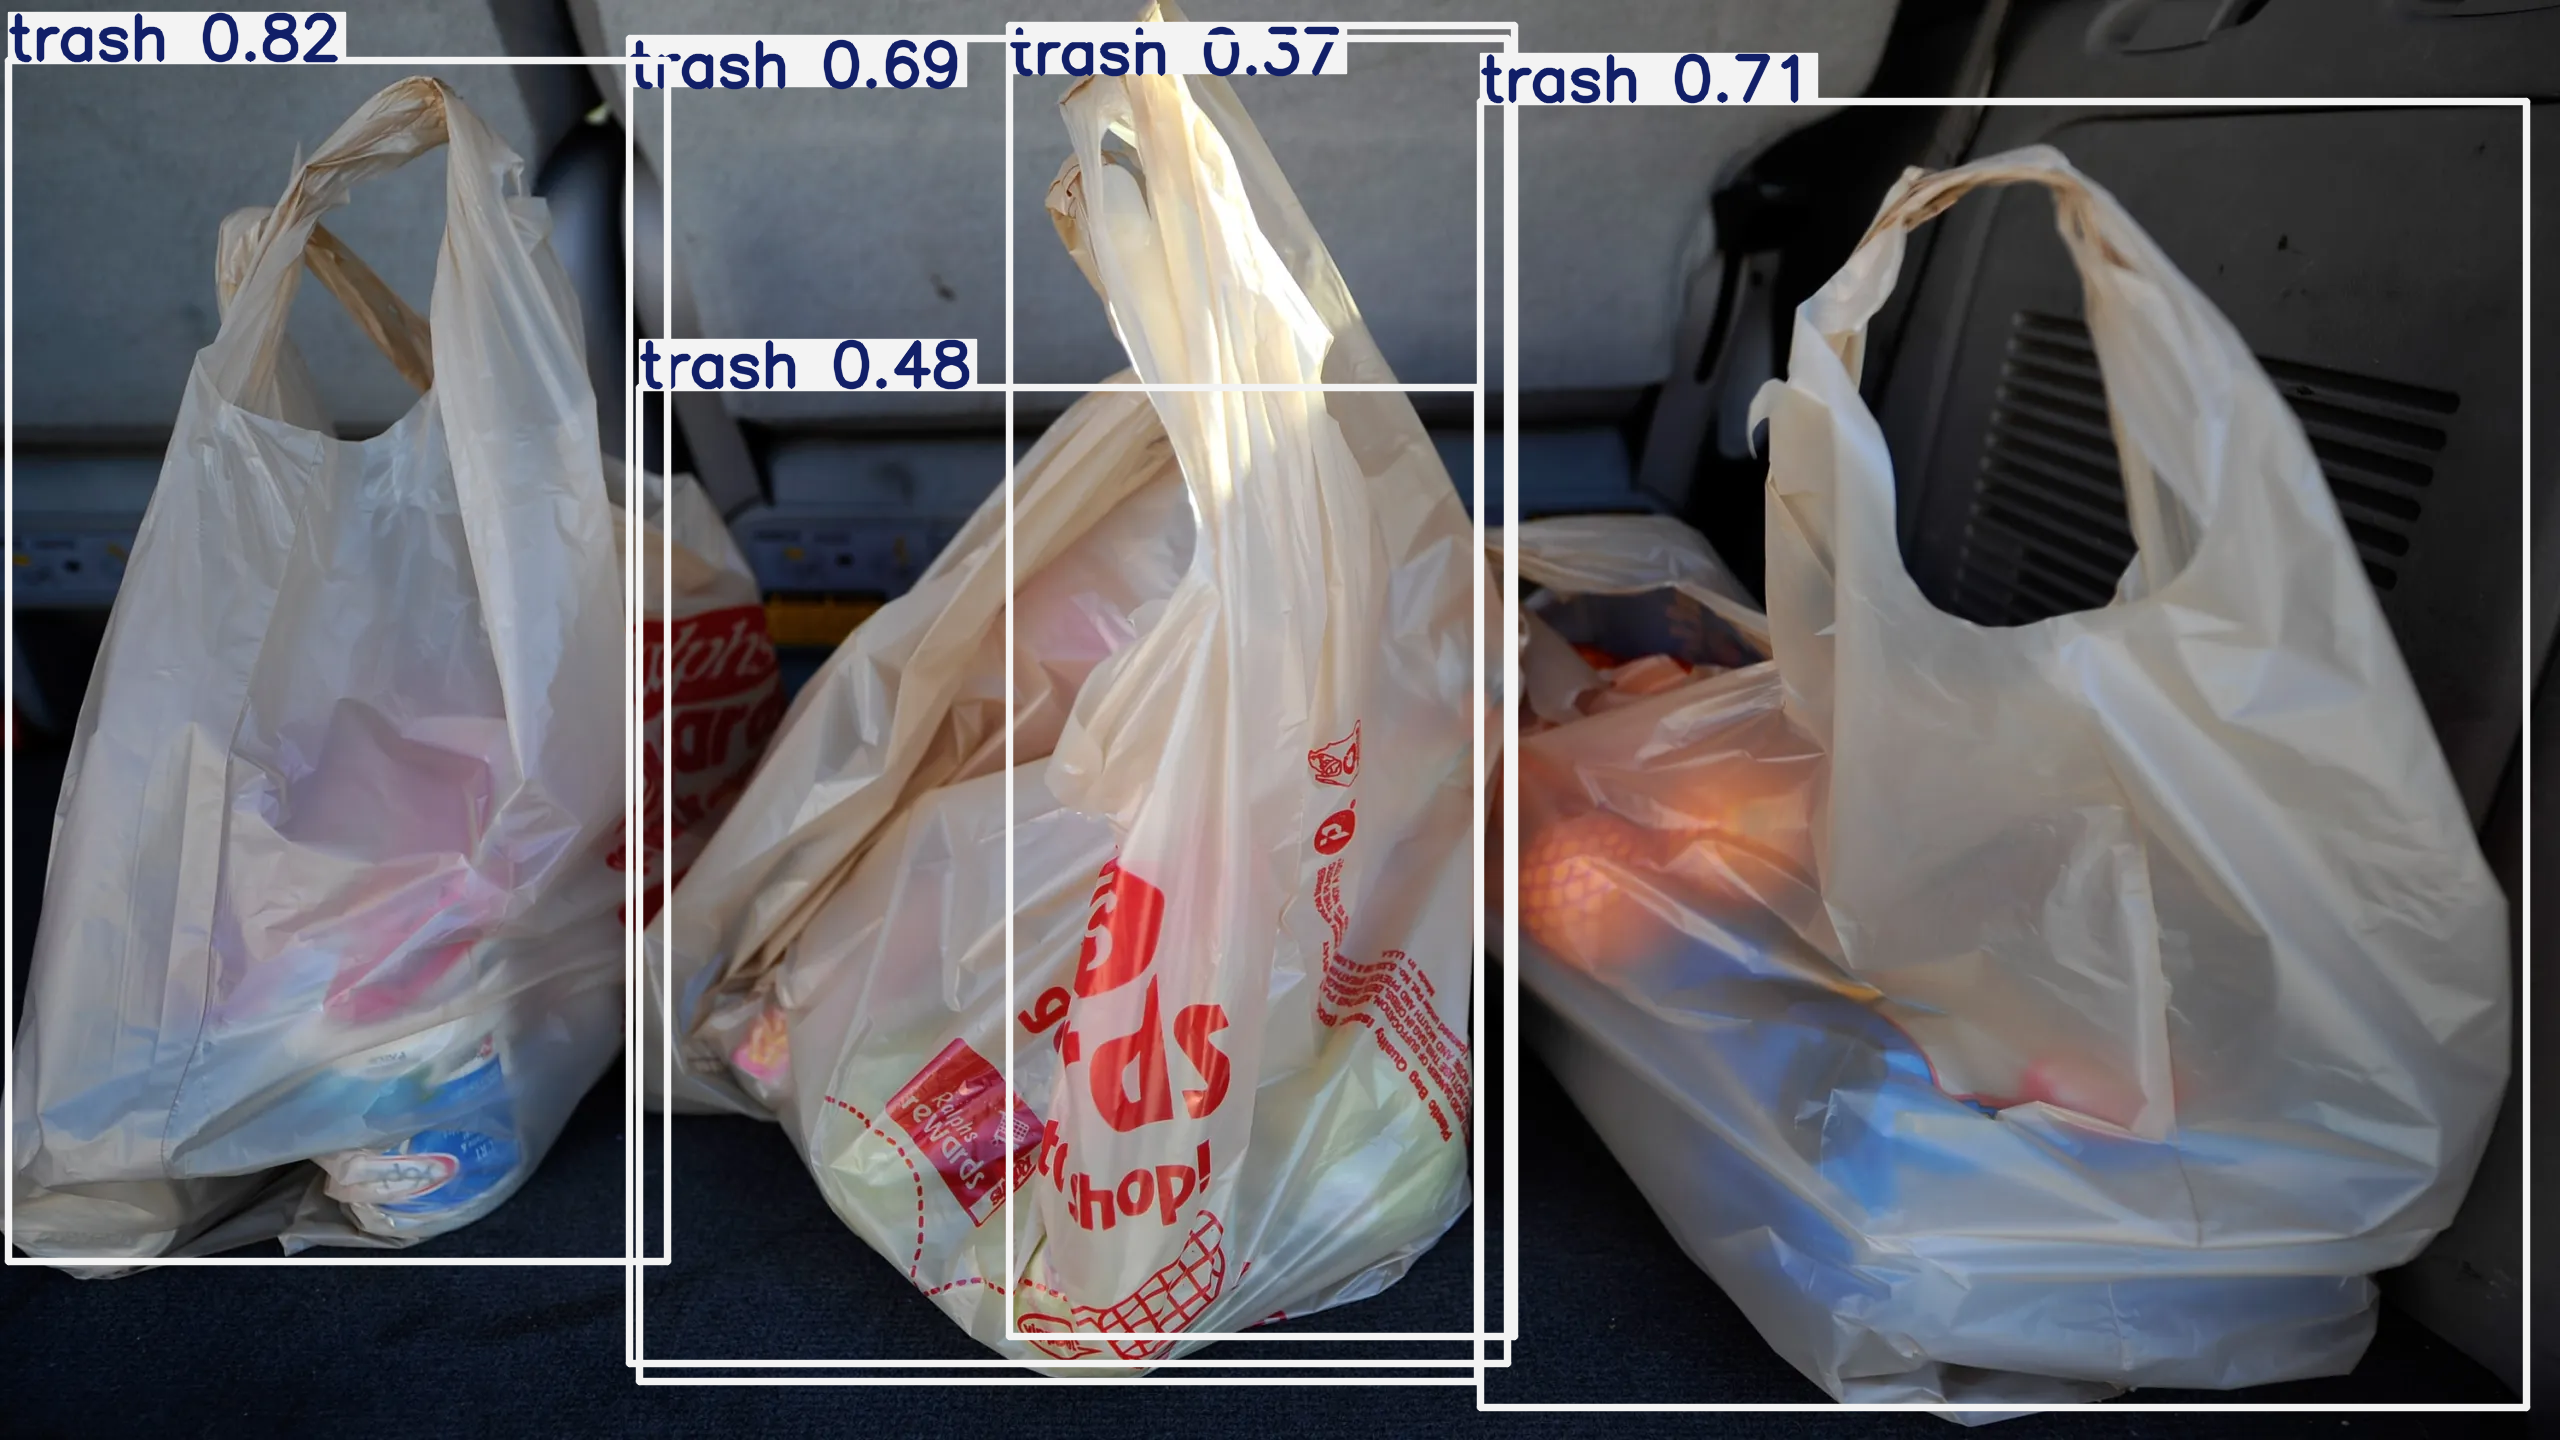

In [ ]:
from PIL import Image
Image.fromarray(result.plot()[:, :, ::-1])

# **NOTES**

Confidence Threshold: https://stackoverflow.com/questions/76054200/how-can-i-evaluate-the-performance-of-a-object-detector-at-a-fixed-confidence-th/76086662#76086662

In [ ]:
#scaled =

In [ ]:
#normalization, finetuning data
#learning rate, follows AI model or not at all?
#10% and 1 images works... using our model!
#DO WE NEED TO FOLLOW AN AI MODEL TO MAKE OUR OBJECT DETECTION MODEL SUCCESSFUL?